# DecisionTreeClassifier with Breast Cancer Wisconsin DataSet

## About Attributes

- id     — Sample code number: id number 

- ct     — Clump Thickness: 1 - 10 

- uof_si — Uniformity of Cell Size: 1 - 10 

- uof_sh — Uniformity of Cell Shape: 1 - 10 

- ma     — Marginal Adhesion: 1 - 10 

- secs   — Single Epithelial Cell Size: 1 - 10 

- bn     — Bare Nuclei: 1 - 10 

- bc     — Bland Chromatin: 1 - 10 

- nn     — Normal Nucleoli: 1 - 10 

- m      — Mitoses: 1 - 10 

- class  — Class: (2 for benign, 4 for malignant)

## Download link:

[LINK](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))

## Imports modules

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Make own easy col-names and watch head of data

In [23]:
names = [
    'id',
    'ct',
    'uof_si',
    'uof_sh',
    'ma',
    'secs',
    'bn',
    'bc',
    'nn',
    'm',
    'class',
]

data = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=names)
data.head()

,id,ct,uof_si,uof_sh,ma,secs,bn,bc,nn,m,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Column «id» is useless. Let's drop it

In [24]:
data = data.drop('id', axis=1)
data.head()

,ct,uof_si,uof_sh,ma,secs,bn,bc,nn,m,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Check unique values in columns

In [25]:
for item in data.columns:
    print('{}:\t{}'.format(item, data[item].unique()))

ct:	[ 5  3  6  4  8  1  2  7 10  9]
uof_si:	[ 1  4  8 10  2  3  7  5  6  9]
uof_sh:	[ 1  4  8 10  2  3  5  6  7  9]
ma:	[ 1  5  3  8 10  4  6  2  9  7]
secs:	[ 2  7  3  1  6  4  5  8 10  9]
bn:	['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
bc:	[ 3  9  1  2  4  5  7  8  6 10]
nn:	[ 1  2  7  4  5  3 10  6  9  8]
m:	[ 1  5  4  2  3  7 10  8  6]
class:	[2 4]


## Column «bn» looks strange, cause has '?' values

## Let's change it on «NaN» from numpy

In [26]:
data[data == '?'] = np.nan

## Counting not-NaN values in columns

In [27]:
data.apply(lambda x: x.count(), axis=0)

ct        699
uof_si    699
uof_sh    699
ma        699
secs      699
bn        683
bc        699
nn        699
m         699
class     699
dtype: int64

## Drop rows with NaN. Them a little bit

In [28]:
data = data.dropna()

## Data types 

In [29]:
data.dtypes

ct         int64
uof_si     int64
uof_sh     int64
ma         int64
secs       int64
bn        object
bc         int64
nn         int64
m          int64
class      int64
dtype: object

## Change data types to category for all columns

In [30]:
for item in data.columns:
    data[item] = data[item].astype('category')

data.dtypes

ct        category
uof_si    category
uof_sh    category
ma        category
secs      category
bn        category
bc        category
nn        category
m         category
class     category
dtype: object

## Make a Target data by «class» column

In [31]:
target = data['class']
target.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: category
Categories (2, int64): [2, 4]

## And drop it from Data

In [32]:
data = data.drop('class', axis=1)
data.head()

,ct,uof_si,uof_sh,ma,secs,bn,bc,nn,m
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


## Split Data and Target by Train and Test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size=0.2)

print('X_train shape:\t{}'.format(X_train.shape))
print('X_test shape:\t{}'.format(X_test.shape), end='\n\n')

print('y_train shape:\t{}'.format(y_train.shape))
print('y_test shape:\t{}'.format(y_test.shape), end='\n\n')

print('Train one mistake %: {:.3f}'.format(1/y_train.shape[0]))
print('Test one mistake %: {:.3f}'.format(1/y_test.shape[0]), end='\n\n')

X_train shape:	(546, 9)
X_test shape:	(137, 9)

y_train shape:	(546,)
y_test shape:	(137,)

Train one mistake %: 0.002
Test one mistake %: 0.007



## DTC: empty-params

In [34]:
dtc_nude = DecisionTreeClassifier()
dtc_nude.fit(X_train, y_train)
print('Train score:\t{:.3f}'.format(dtc_nude.score(X_train, y_train)))
print('Test score:\t{:.3f}'.format(dtc_nude.score(X_test, y_test)))

Train score:	1.000
Test score:	0.949


### Report
- Empty model has None-value in max-depth → it overfits train data

## DTC: criterion → 'entropy' | instead 'gini'

In [35]:
dtc_ent = DecisionTreeClassifier(criterion='entropy')
dtc_ent.fit(X_train, y_train)
print('Train score:\t{:.3f}'.format(dtc_ent.score(X_train, y_train)))
print('Test score:\t{:.3f}'.format(dtc_ent.score(X_test, y_test)))

Train score:	1.000
Test score:	0.964


### Report
- 'entropy' is harder calculated, then 'gini', cause it has log-function

## DTC: splitter → 'random' | instead 'best'

In [36]:
dtc_splrand = DecisionTreeClassifier(splitter='random')
dtc_splrand.fit(X_train, y_train)
print('Train score:\t{:.3f}'.format(dtc_splrand.score(X_train, y_train)))
print('Test score:\t{:.3f}'.format(dtc_splrand.score(X_test, y_test)))

Train score:	1.000
Test score:	0.927


### Report
- Random can make your results better or worse → cause it's random

## DTC: max-depth = 1 → 15

In [37]:
user_max_depth = 15
list_max_depth = np.arange(1, user_max_depth+1)
y_axis = np.arange(0.7, 1.01, 0.1)
y_axis = np.around(y_axis, 3)

train_score_list = []
test_score_list = []

for i_depth in list_max_depth:
    model = DecisionTreeClassifier(max_depth=i_depth)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

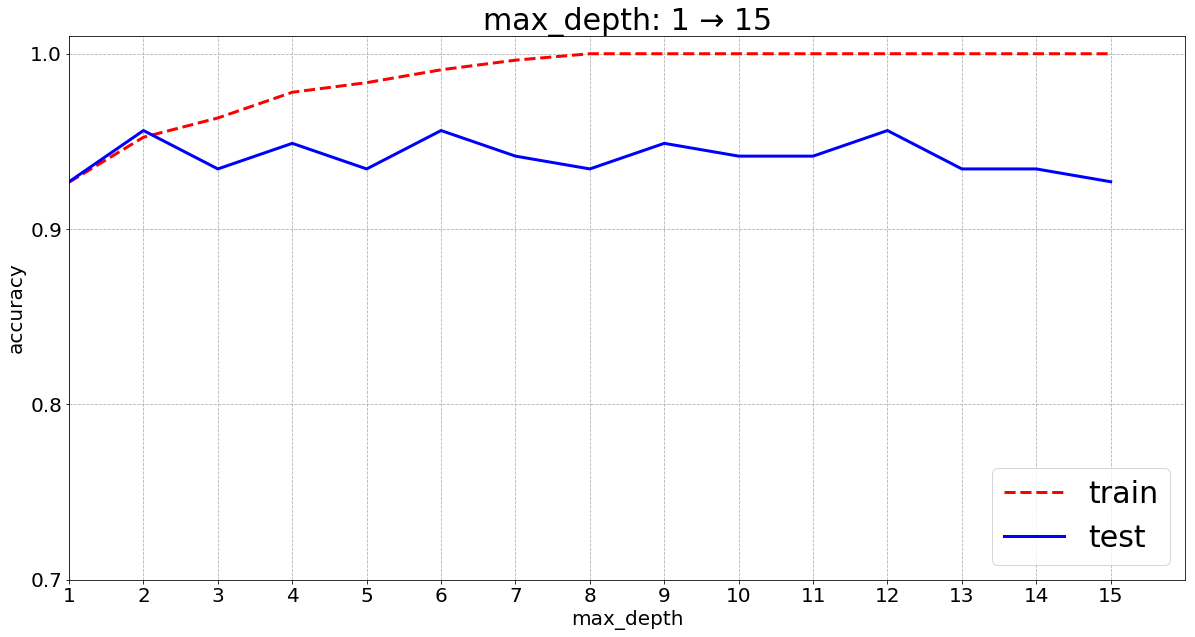

In [38]:
plt.figure(figsize=(20,10))

plt.plot(train_score_list, 'r--', linewidth=3, label='train')
plt.plot(test_score_list, 'b-', linewidth=3, label='test')

plt.ylim(top=1.01, bottom=0.7)
plt.xlim(left=1, right=user_max_depth)

plt.yticks(y_axis, tuple(y_axis), fontsize=20)
plt.xticks(list_max_depth-1, tuple(list_max_depth), fontsize=20)

plt.title('max_depth: 1 → {}'.format(user_max_depth), fontsize=30)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('max_depth', fontsize=20)

plt.legend(loc=4, prop={'size': 30})
plt.grid(linestyle='--')

plt.show()

### Report
- With growing up of max-depth → train score will go to 1

## DTC: min_samples_split = 2 → 15

In [39]:
user_min_samples_split = 15
list_min_samples_split = np.arange(2, user_min_samples_split+2)
y_axis = np.arange(0.7, 1.01, 0.1)
y_axis = np.around(y_axis, 3)

train_score_list = []
test_score_list = []

for i_samples in list_min_samples_split:
    model = DecisionTreeClassifier(min_samples_split=i_samples)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

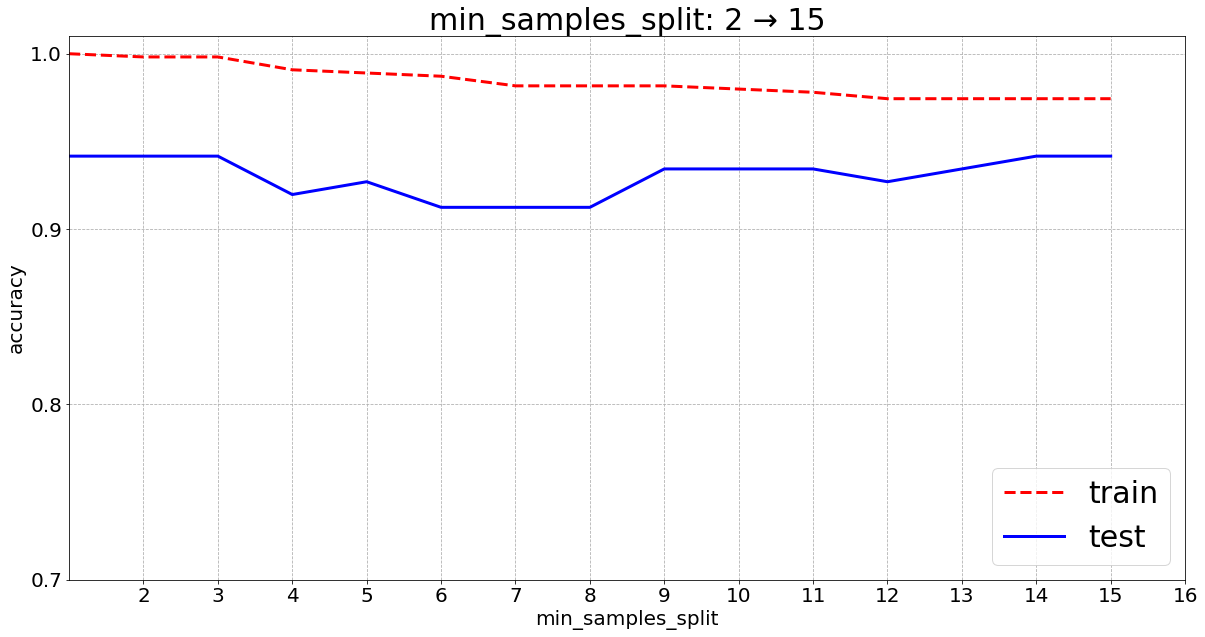

In [40]:
plt.figure(figsize=(20,10))

plt.plot(train_score_list, 'r--', linewidth=3, label='train')
plt.plot(test_score_list, 'b-', linewidth=3, label='test')

plt.ylim(top=1.01, bottom=0.7)
plt.xlim(left=0, right=user_min_samples_split)

plt.yticks(y_axis, tuple(y_axis), fontsize=20)
plt.xticks(list_min_samples_split-1, tuple(list_min_samples_split), fontsize=20)

plt.title('min_samples_split: 2 → {}'.format(user_min_samples_split), fontsize=30)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('min_samples_split', fontsize=20)

plt.legend(loc=4, prop={'size': 30})
plt.grid(linestyle='--')

plt.show()

### Report
- Then more mss, then more we force model to split even if it not necessary

## DTC: min_samples_leaf = 1 → 15

In [41]:
user_min_samples_leaf = 50
list_min_samples_leaf = np.arange(1, user_min_samples_leaf+1)
y_axis = np.arange(0.7, 1.01, 0.1)
y_axis = np.around(y_axis, 3)

train_score_list = []
test_score_list = []

for i_samples_leaf in list_min_samples_leaf:
    model = DecisionTreeClassifier(min_samples_leaf=i_samples_leaf)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

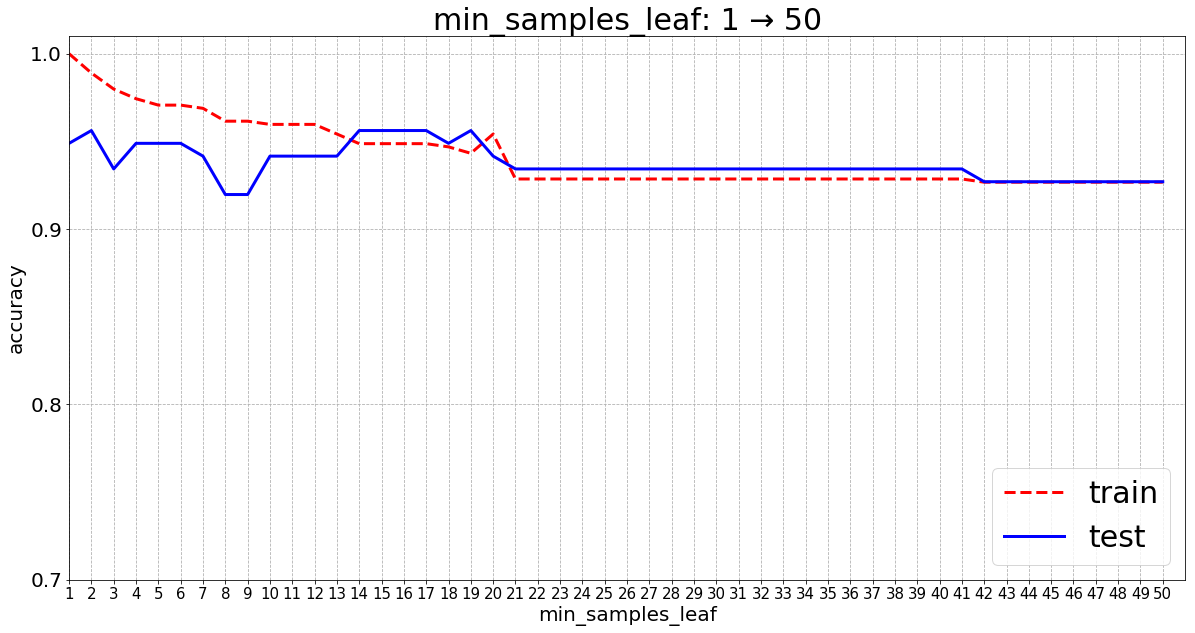

In [42]:
plt.figure(figsize=(20,10))

plt.plot(train_score_list, 'r--', linewidth=3, label='train')
plt.plot(test_score_list, 'b-', linewidth=3, label='test')

plt.ylim(top=1.01, bottom=0.7)
plt.xlim(left=1, right=user_min_samples_leaf)

plt.yticks(y_axis, tuple(y_axis), fontsize=20)
plt.xticks(list_min_samples_leaf-1, tuple(list_min_samples_leaf), fontsize=15)

plt.title('min_samples_leaf: 1 → {}'.format(user_min_samples_leaf), fontsize=30)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('min_samples_leaf', fontsize=20)

plt.legend(loc=4, prop={'size': 30})
plt.grid(linestyle='--')

plt.show()

### Report
- We make min limit of leaf, and model stop splitting earlier

# Thanx

![otgw](otgw.gif)